In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(instance='ibm-q/open/main')
backends = service.backends(simulator=False,min_num_qubits=10)
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyoto')>, <IBMBackend('ibm_osaka')>, <IBMBackend('ibm_sherbrooke')>]


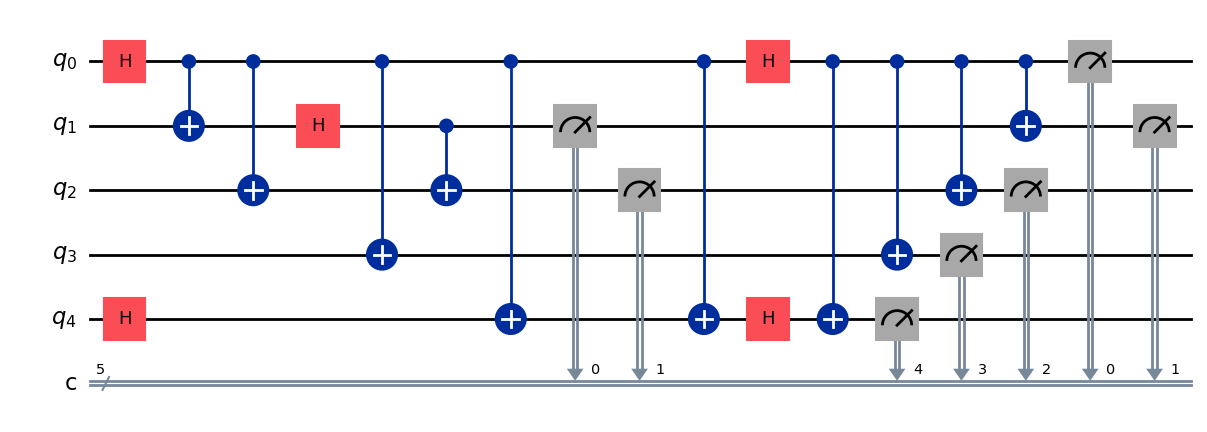

In [16]:
from qiskit import QuantumCircuit,transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
# Initialize the number of qubits
num_qubits = 5

# Initialize the Quantum Circuit with 5 qubits and 5 classical bits
qc = QuantumCircuit(5, 5) 
q = QuantumRegister(num_qubits, 'q')
c = ClassicalRegister(num_qubits, 'c')
# Perform Hadamard operation on q[0] and q[4]
qc.h(0)
qc.h(4)

# Perform CX operation on q[0] & q[1], q[0] & q[2], q[0] & q[3], q[0] & q[4]
qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(0, 3)
qc.cx(0, 4)

# Perform Bell State Measurement
qc.h(1)
qc.cx(1, 2)
qc.measure([1, 2], [0, 1])

# Perform CX operation on q[0],q[4]
qc.cx(0, 4)

# Perform Hadamard operation on q[0] and q[4]
qc.h(0)
qc.h(4)

#Perform cx operation on q[0],q[4], on q[0],q[3], on q[0],q[2] then on q[0],q[1]
qc.cx(0, 4)
qc.cx(0, 3)
qc.cx(0, 2)
qc.cx(0, 1)
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
qc.draw('mpl')


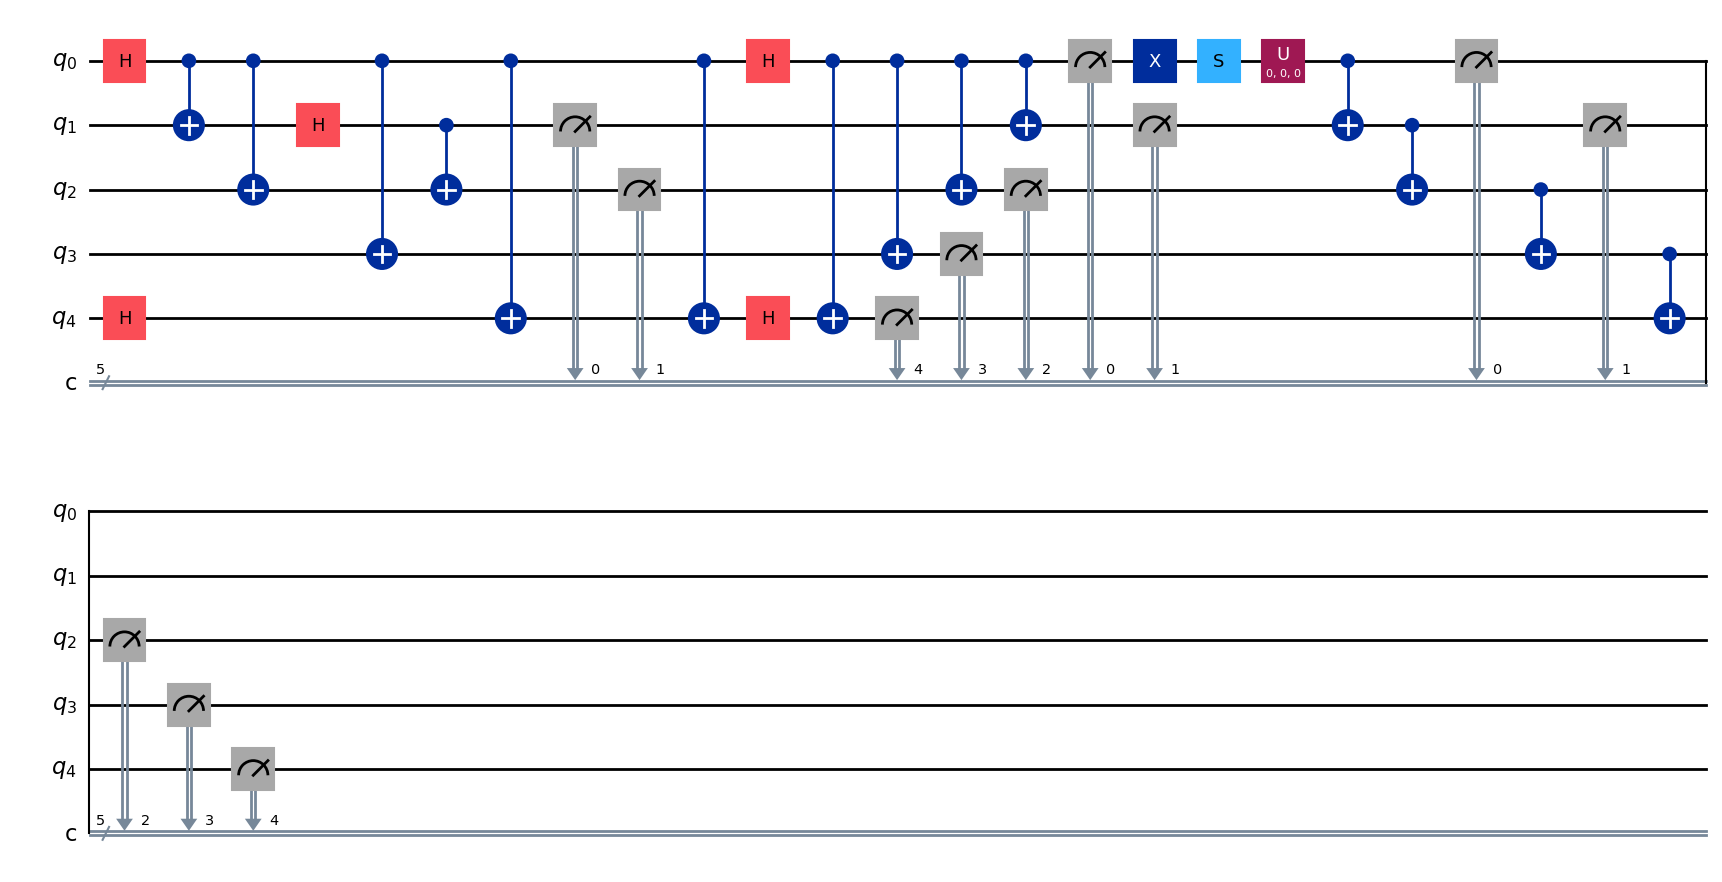

In [17]:
# Encoding Quantum Information
# Apply NOT operation on Qr[0]
qc.x(0)

# Apply S and U operations along with operations on X, Y, and Z axes on Qr[0]
qc.s(0)  # S gate
qc.u(0, 0, 0, 0)  # U gate with arbitrary parameters

# Loop over qubits from 0 to n-2
for i in range(num_qubits - 1):
    # Perform CNOT operation between Qr[i] and Qr[i+1]
    qc.cx(i, i+1)

# Loop over qubits from 0 to n-1
for i in range(num_qubits):
    # Copy the quantum state from Qr[i] to Cr[i]
    qc.measure(i, i)

qc.draw('mpl')

In [18]:
# Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

# Get the measured classical bits
counts = result.get_counts()
print("Measured classical bits:", counts)

# Transfer the encoded information to the receiver through the depolarization quantum channel
# (not implemented here)

Measured classical bits: {'11011': 135, '01100': 123, '01010': 125, '01110': 130, '11101': 127, '11111': 138, '11001': 125, '01000': 121}


C:\Users\hp\AppData\Local\Temp\ipykernel_6368\1359666918.py:5: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


In [19]:
# Calculate the probability of state |01100>
if '01000' in counts:
    error_probability_01000 = counts['01000'] / sum(counts.values())
else:
    error_probability_01000 = 0

# Calculate the error value
probability1 = 1 - error_probability_01000
print("Probability:", probability1)
print("Error Probability:", error_probability_01000)

Probability: 0.8818359375
Error Probability: 0.1181640625


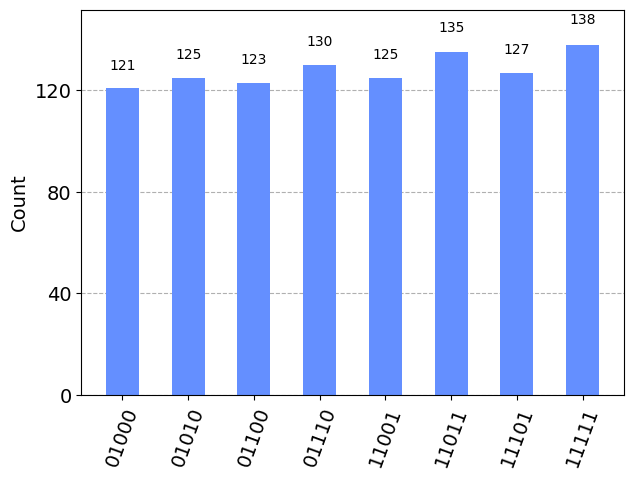

In [20]:
plot_histogram(counts)

In [22]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.exceptions import QiskitError

error_rate = 0.5

depolarizing_error_single = depolarizing_error(error_rate, 1)
depolarizing_error_two = depolarizing_error(error_rate, 2)

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error_single, ['id', 'x', 'y', 'z', 'h', 's', 'u'])
noise_model.add_all_qubit_quantum_error(depolarizing_error_two, ['cx'])

transpiled_qc = transpile(qc, optimization_level=0)

simulator = AerSimulator(noise_model=noise_model)
qobj = assemble(transpiled_qc)

result = simulator.run(qobj).result()


experiment_ids = [exp.header.name for exp in result.results]
for exp_id in experiment_ids:
    try:
        counts = result.get_counts(exp_id)
        print(f"Counts for experiment '{exp_id}':", counts)
    except QiskitError as e:
        print(f"Error retrieving counts for experiment '{exp_id}': {e}")
print(f"\n")
print(f"Error/Noise in the Quantum Channel before using Error Detection and Correction Mechanism:",error_rate)

C:\Users\hp\AppData\Local\Temp\ipykernel_6368\1675927632.py:21: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Counts for experiment 'circuit-192': {'00100': 33, '10111': 31, '00110': 28, '01001': 42, '11101': 35, '10100': 29, '01110': 36, '00000': 26, '01101': 27, '10010': 32, '01011': 35, '10001': 37, '11110': 28, '01010': 41, '11111': 31, '00111': 32, '10011': 29, '00010': 26, '11011': 39, '00101': 38, '01100': 36, '00001': 42, '11000': 36, '01000': 29, '10101': 22, '11001': 28, '10110': 24, '00011': 21, '01111': 34, '11010': 33, '10000': 32, '11100': 32}


Error/Noise in the Quantum Channel before using Error Detection and Correction Mechanism: 0.5


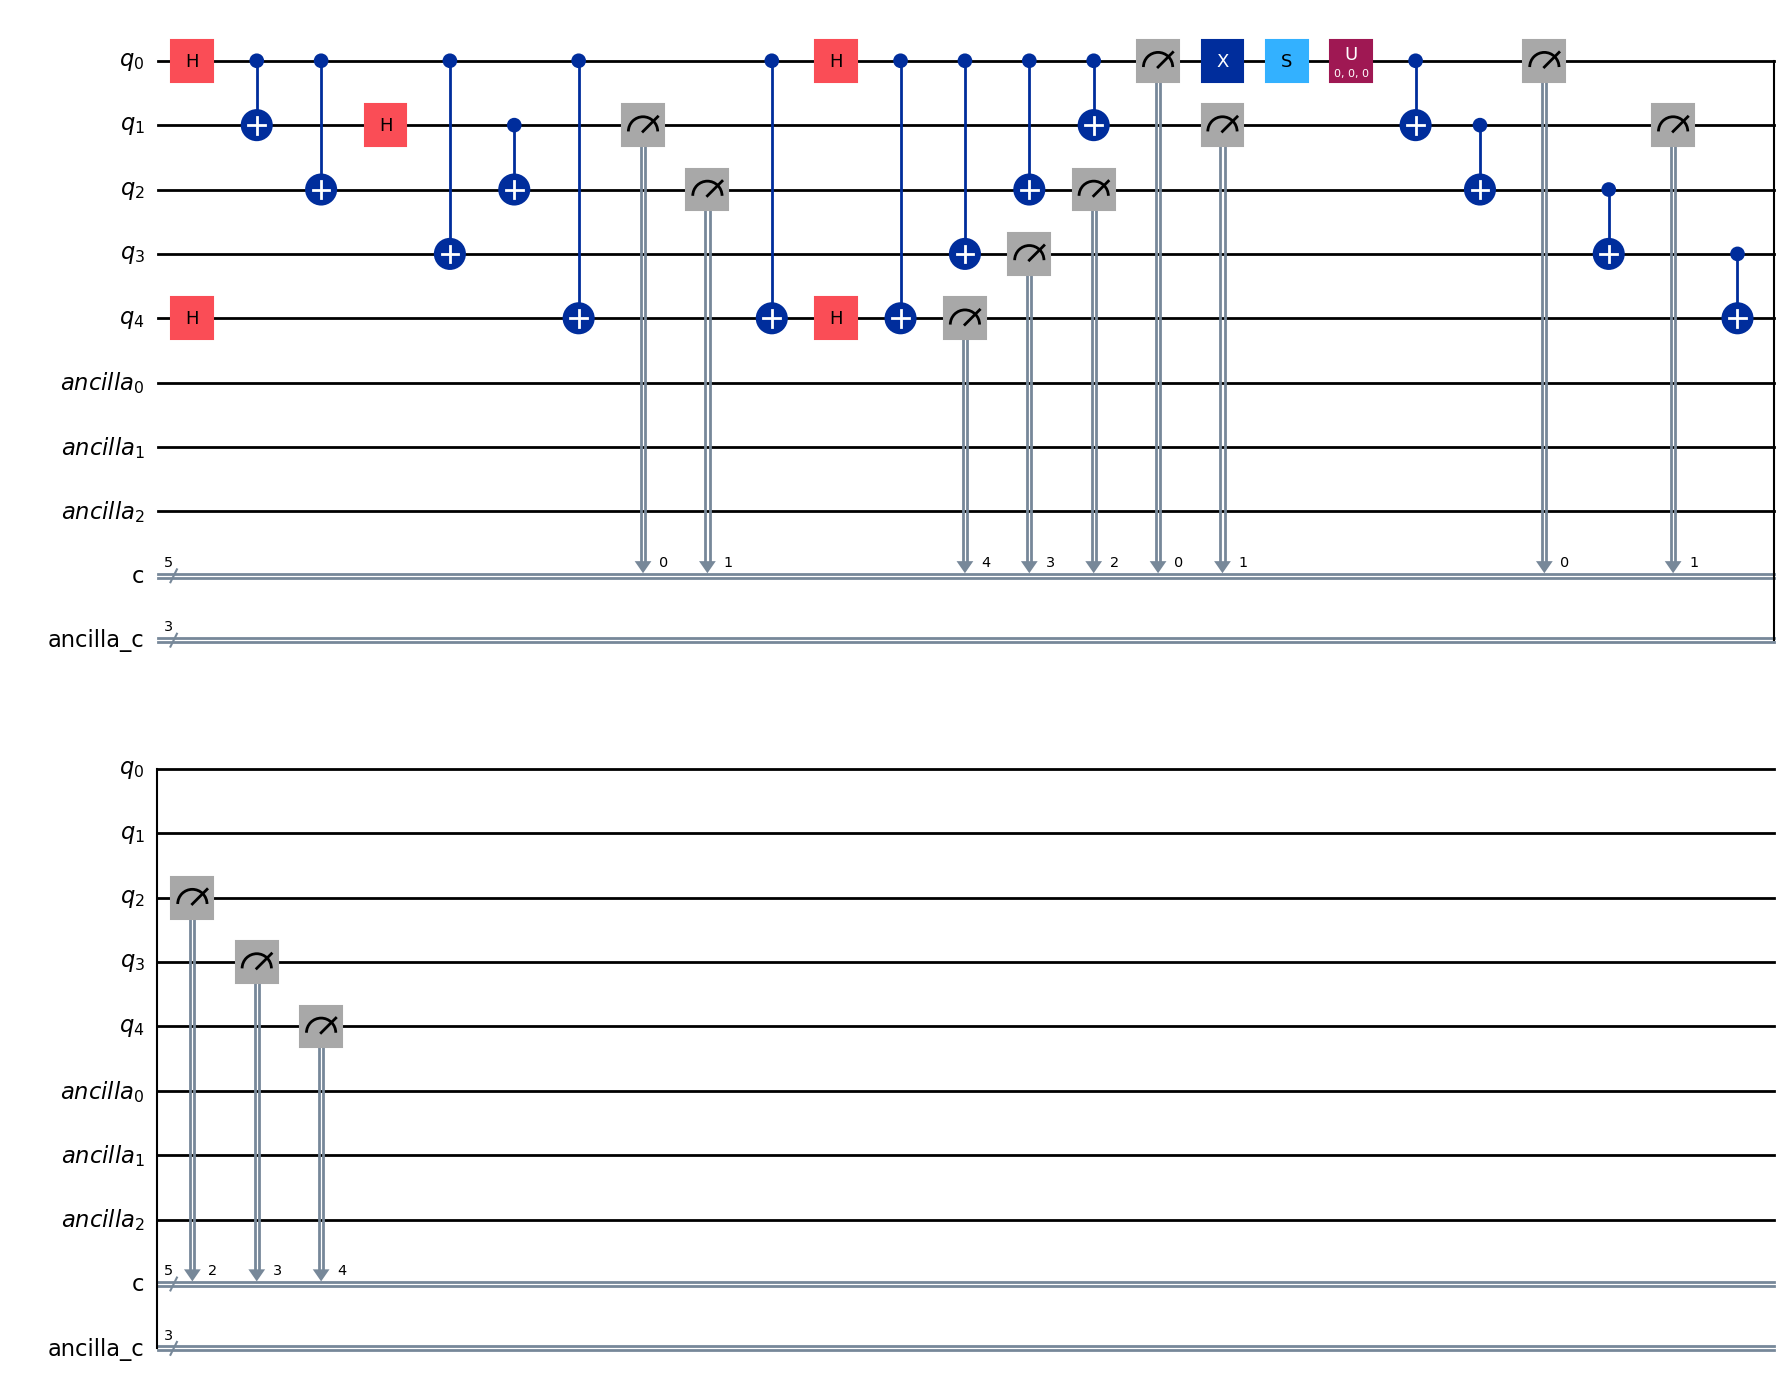

In [23]:
from qiskit import QuantumRegister, ClassicalRegister
num_ancilla_qubits = 3
ancilla = QuantumRegister(num_ancilla_qubits, 'ancilla')
qc.add_register(ancilla)
ancilla_c = ClassicalRegister(num_ancilla_qubits, 'ancilla_c')
qc.add_register(ancilla_c)
qc.draw('mpl')

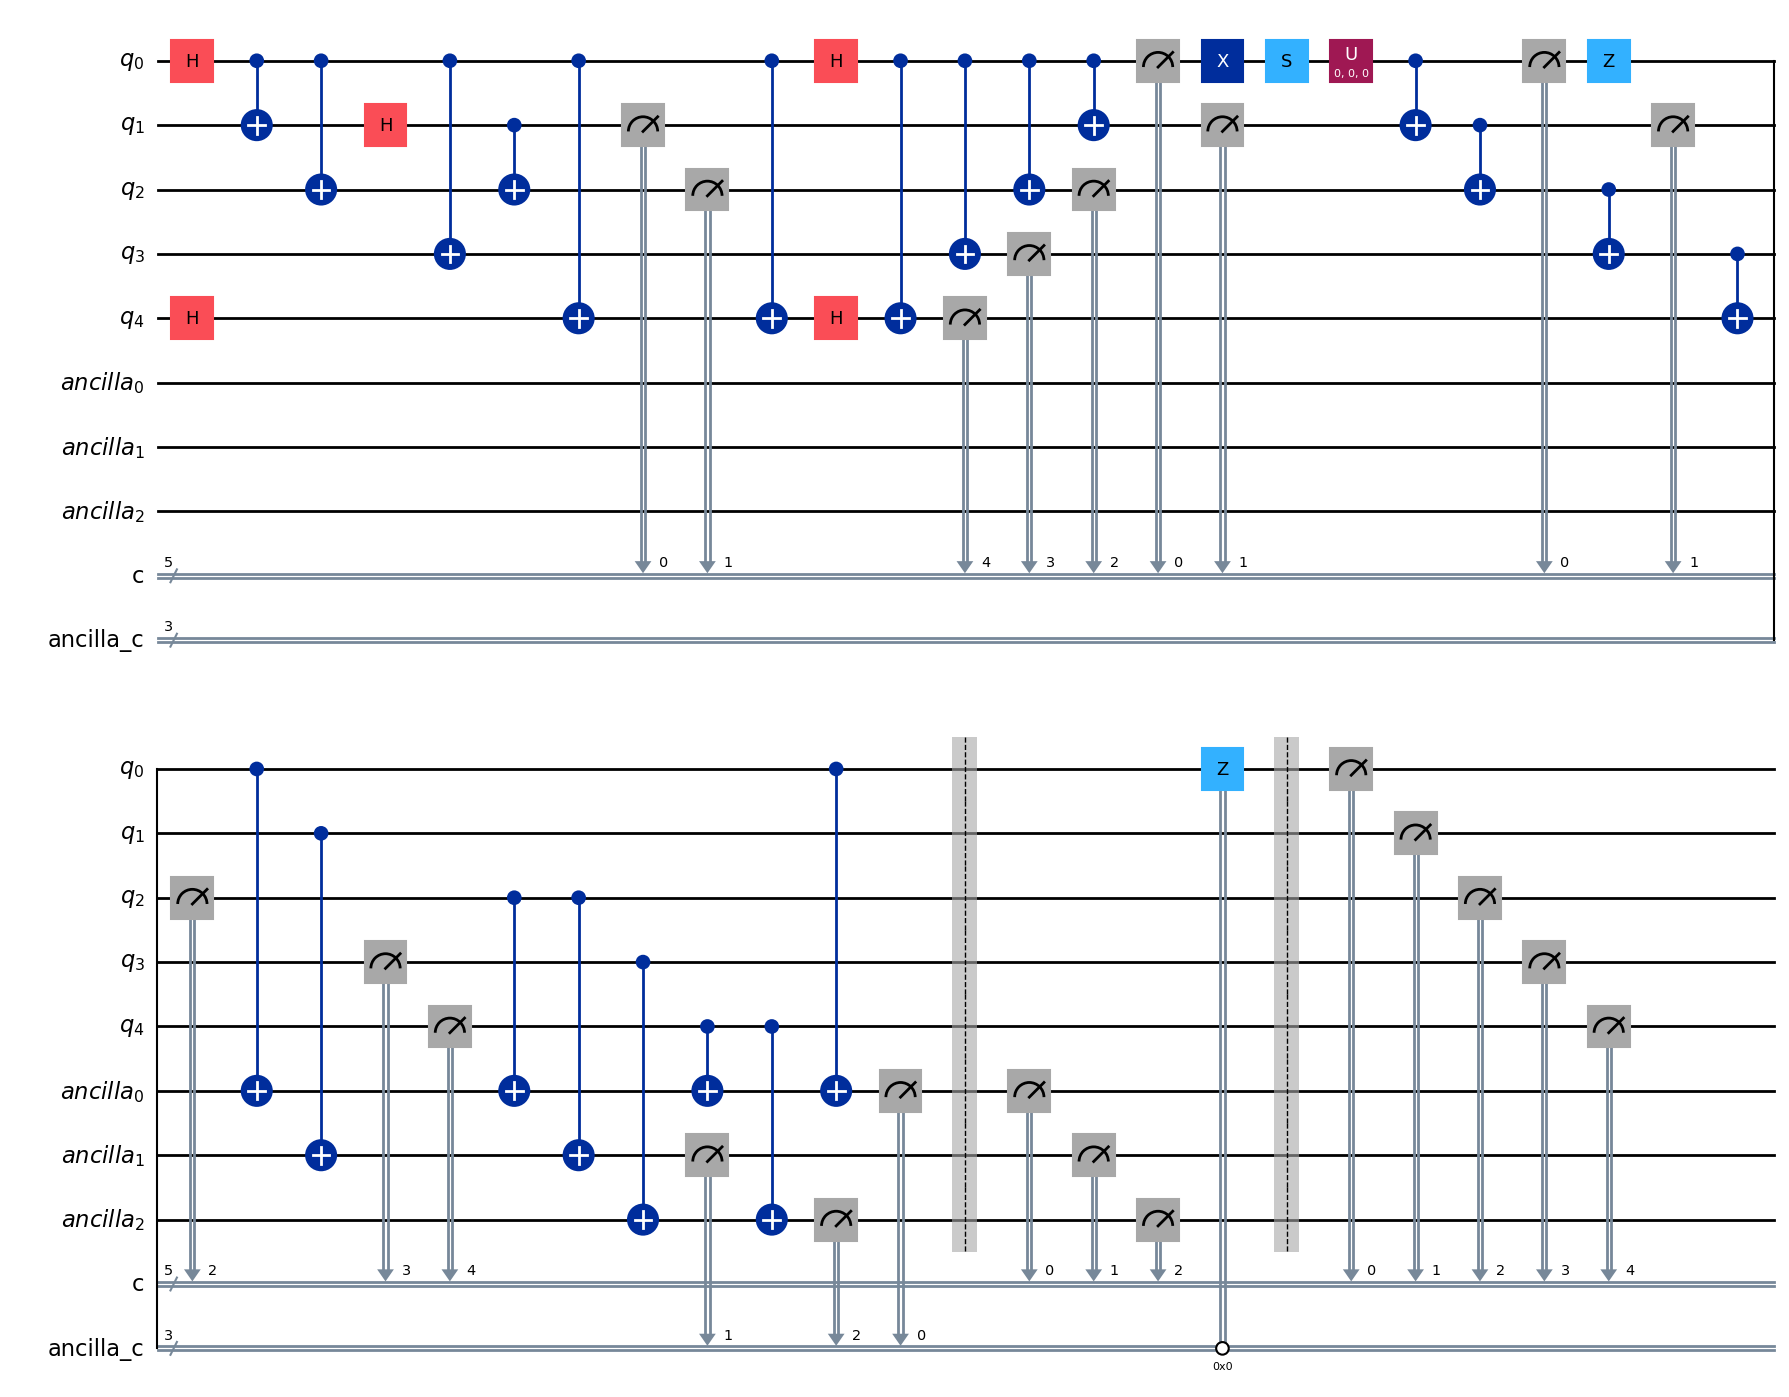

In [24]:

# Step 4: q[0] ← Z
qc.z(q[0])

# Step 5-11: Controlled NOT operations
qc.cx(q[0], ancilla[0])
qc.cx(q[1], ancilla[1])
qc.cx(q[2], ancilla[0])
qc.cx(q[2], ancilla[1])
qc.cx(q[3], ancilla[2])
qc.cx(q[4], ancilla[0])
qc.cx(q[4], ancilla[2])

# Step 12-14: Store information from quantum register to Ancilla register
for i in range(num_qubits // 3):
    qc.cx(q[i], ancilla[i])

# Step 15: Measure the information stored in ancilla register
qc.measure(ancilla, ancilla_c)

# Step 16: Initialize Ar with the combination of ancilla qubits
qc.barrier()
qc.measure(ancilla, c[:3])  # Measure ancilla register and store in classical register

# Step 17-19: Conditional Z gate on initial qubit
qc.z(q[0]).c_if(ancilla_c, 0)

# Step 20-23: Store information from Quantum register to Classical register
qc.barrier()
qc.measure(q, c)
qc.draw('mpl')


In [25]:
from qiskit_aer import AerSimulator
# Simulate the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

# Get the measured classical bits
counts = result.get_counts()
print("Measured classical bits:", counts)

C:\Users\hp\AppData\Local\Temp\ipykernel_6368\1316320705.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Measured classical bits: {'111 01100': 128, '110 01010': 136, '001 11001': 151, '010 11101': 115, '011 11011': 150, '000 11111': 116, '100 01000': 114, '101 01110': 114}


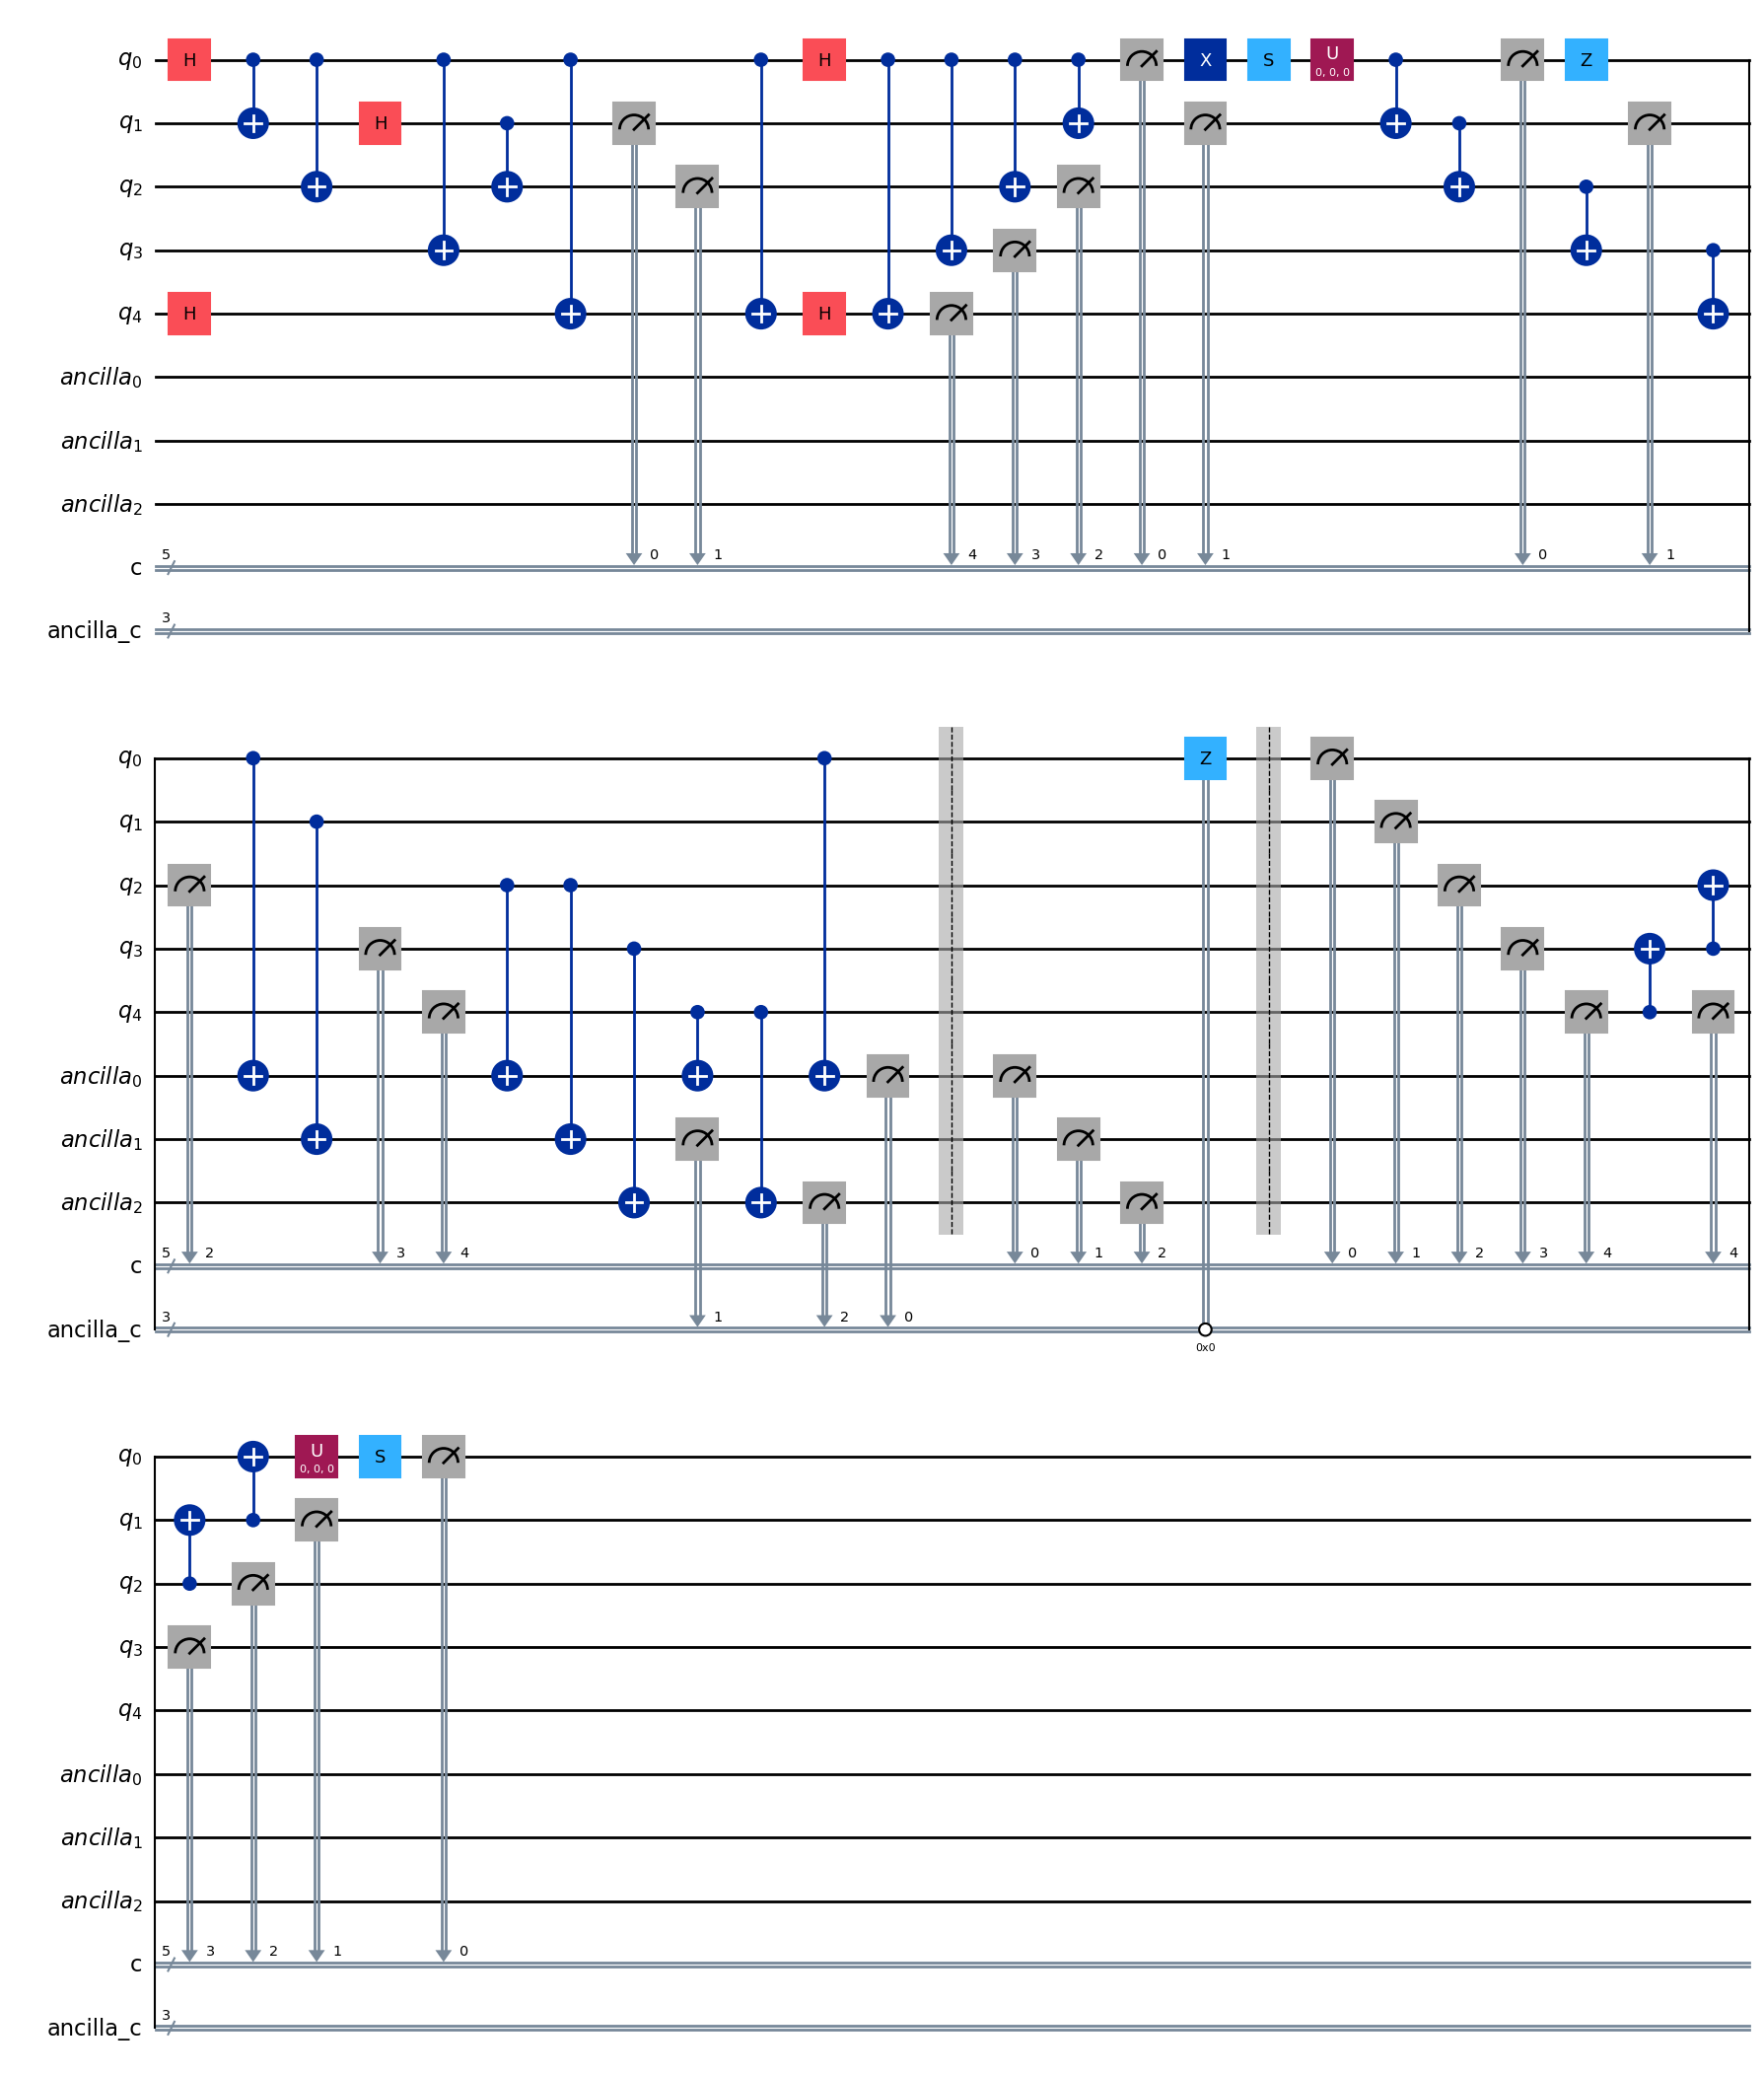

In [26]:
#Decoding
# Step 3: Perform CNOT operations from q[n-1] to q[0]
for i in range(num_qubits-1, 0, -1):
    qc.cx(q[i], q[i-1])

# Step 6-7: Apply Unitary operation followed by S gate on q[0]
# Define your unitary operation here, let's say it's a Hadamard gate
qc.u(0, 0, 0, 0) 
qc.s(0)

# Step 8-10: Store quantum information in classical register
for i in range(num_qubits):
    qc.measure(q[i], c[i])

# Step 11: Measure the classical register
qc.draw('mpl')

In [27]:
from qiskit_aer import AerSimulator
# Simulate the quantum circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

# Get the measured classical bits
counts = result.get_counts()
print("Measured classical bits:", counts)

Measured classical bits: {'100 01111': 112, '000 10101': 128, '110 01100': 124, '001 10001': 143, '101 01011': 124, '010 10110': 149, '011 10010': 142, '111 01000': 102}


C:\Users\hp\AppData\Local\Temp\ipykernel_6368\1316320705.py:6: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


In [28]:
# Calculate the probability of state |01100>
if '111 01000' in counts:
    error_probability_11101000 = counts['111 01000'] / sum(counts.values())
else:
    error_probability_11101000 = 0

# Calculate the error value
probability2 = 1 - error_probability_11101000
print("Probability:", probability2)
print("Error probability:", error_probability_11101000)

Probability: 0.900390625
Error probability: 0.099609375


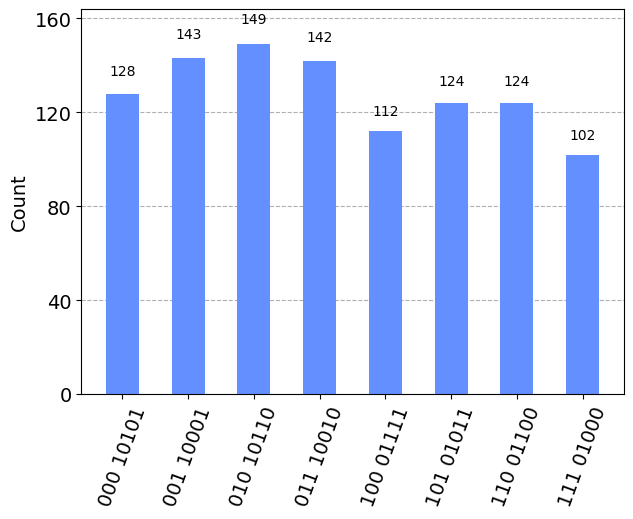

In [29]:
plot_histogram(counts)